# Social Media Sentiments Analysis

## Table of Contents  <a id='back'></a> 
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Header Style](#header-style)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Data Usage and Formatting](#data-usage-and-formatting)
- [Data Analysis](#data-analysis)
- [Conclusion](#conclusion)

<a name='headers'>

## Project Introduction


### Analysis Outline


### Results

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing file for assignment
try:
    sm = pd.read_csv('sentimentdataset.csv')
except:
    sm = pd.read_csv('/datasets/sentimentdataset.csv')

[Back to Table of Contents](#back)

## Pre-Processing Data

### Header Style

In [3]:
# Getting general information about the dataset
sm.info()
sm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
#checking for snakecase format
sm.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [5]:
# Renaming column names to snake_case format
sm = sm.rename(columns={'Unnamed: 0.1': 'unnamed_0.01',
                        'Unnamed: 0': 'unnamed_0',
                        'Text': 'text',
                        'Sentiment': 'sentiment',
                        'Timestamp': 'timestamp',
                        'User': 'user',
                        'Platform': 'platform',
                        'Hashtags': 'hashtags',
                        'Retweets': 'reshared',
                        'Likes': 'likes',
                        'Country': 'country',
                        'Year': 'year',
                        'Month': 'month',
                        'Day': 'day',
                        'Hour': 'hour'})
sm.columns

Index(['unnamed_0.01', 'unnamed_0', 'text', 'sentiment', 'timestamp', 'user',
       'platform', 'hashtags', 'reshared', 'likes', 'country', 'year', 'month',
       'day', 'hour'],
      dtype='object')

### Duplicates

In [6]:
# Checking for duplicates
sm.duplicated().sum()

0

### Missing Values

In [7]:
# Checking for null values
sm.isna().sum()

unnamed_0.01    0
unnamed_0       0
text            0
sentiment       0
timestamp       0
user            0
platform        0
hashtags        0
reshared        0
likes           0
country         0
year            0
month           0
day             0
hour            0
dtype: int64

### Data Usage and Formatting

In [8]:
sm.info()
sm.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unnamed_0.01  732 non-null    int64  
 1   unnamed_0     732 non-null    int64  
 2   text          732 non-null    object 
 3   sentiment     732 non-null    object 
 4   timestamp     732 non-null    object 
 5   user          732 non-null    object 
 6   platform      732 non-null    object 
 7   hashtags      732 non-null    object 
 8   reshared      732 non-null    float64
 9   likes         732 non-null    float64
 10  country       732 non-null    object 
 11  year          732 non-null    int64  
 12  month         732 non-null    int64  
 13  day           732 non-null    int64  
 14  hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


,unnamed_0.01,unnamed_0,text,sentiment,timestamp,user,platform,hashtags,reshared,likes,country,year,month,day,hour
456,457,461,"Wandering in the maze of betrayal, the walls c...",Betrayal,2021-01-05 16:20:00,MazeWanderer,Instagram,#Betrayal #ClosingWalls,15.0,30.0,Germany,2021,1,5,16


In [9]:
# Looking at both of the numeric unnamed columns, it appears to look like a column 
# that was accidentally recording the row value. If they are we can remove these columns.

sm['unnamed_0'].isin(sm['unnamed_0.01']).count()

732

In [10]:
# After uncovering that these two columns are identical to the row value, 
# they can be removed to optimize data usage

sm = sm.drop(columns=['unnamed_0.01', 'unnamed_0'])
sm.head()

,text,sentiment,timestamp,user,platform,hashtags,reshared,likes,country,year,month,day,hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [11]:
# Checking the text column

sm['text'].head()

0     Enjoying a beautiful day at the park!        ...
1     Traffic was terrible this morning.           ...
2     Just finished an amazing workout! 💪          ...
3     Excited about the upcoming weekend getaway!  ...
4     Trying out a new recipe for dinner tonight.  ...
Name: text, dtype: object

In [12]:
# Lowering the text column to snakecase format and removing spaces from the fron and end of the the text values

sm['text'] = sm['text'].str.lower()
sm['text'] = sm['text'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['text'] = sm['text'].apply(lambda x: x.replace(' ', '_'))
sm['text'].head()

0          enjoying_a_beautiful_day_at_the_park!
1             traffic_was_terrible_this_morning.
2            just_finished_an_amazing_workout!_💪
3    excited_about_the_upcoming_weekend_getaway!
4    trying_out_a_new_recipe_for_dinner_tonight.
Name: text, dtype: object

In [13]:
# Checking the sentiment column

sm['sentiment'].head()

0     Positive  
1     Negative  
2     Positive  
3     Positive  
4     Neutral   
Name: sentiment, dtype: object

In [14]:
# Lowering the elements to snakecase format, removing irregular spaces, and changing the data type to lower data usage

sm['sentiment'] = sm['sentiment'].str.lower()
sm['sentiment'] = sm['sentiment'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['sentiment'] = sm['sentiment'].apply(lambda x: x.replace(' ', '_'))
sm['sentiment'] = sm['sentiment'].astype('category')
sm['sentiment'].head()

0    positive
1    negative
2    positive
3    positive
4     neutral
Name: sentiment, dtype: category
Categories (191, object): ['acceptance', 'accomplishment', 'admiration', 'adoration', ..., 'wonder', 'wonderment', 'yearning', 'zest']

In [15]:
# Looking at the first few values it shows the time stamp column is a string type but
# we should convert it to a datetime type to save data usage

sm['timestamp'] = pd.to_datetime(sm['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [16]:
# Checking the user column

sm['user'].head()

0     User123      
1     CommuterX    
2     FitnessFan   
3     AdventureX   
4     ChefCook     
Name: user, dtype: object

In [17]:
# Lowering the user column to snakecase format and removing spaces that are not needed

sm['user'] = sm['user'].str.lower()
sm['user'] = sm['user'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['user'].head()

0       user123
1     commuterx
2    fitnessfan
3    adventurex
4      chefcook
Name: user, dtype: object

In [18]:
# Checking the platform column

sm['platform'].head()

0      Twitter  
1      Twitter  
2     Instagram 
3      Facebook 
4     Instagram 
Name: platform, dtype: object

In [19]:
# Lowering the platform column to snakecase format and fixing spacing typos

sm['platform'] = sm['platform'].str.lower()
sm['platform'] = sm['platform'].apply(lambda x: x.strip())
sm['platform'] = sm['platform'].astype('category')
sm['platform'].head()

0      twitter
1      twitter
2    instagram
3     facebook
4    instagram
Name: platform, dtype: category
Categories (3, object): ['facebook', 'instagram', 'twitter']

In [20]:
# Checking the hashtags column

sm['hashtags'].head()

0     #Nature #Park                            
1     #Traffic #Morning                        
2     #Fitness #Workout                        
3     #Travel #Adventure                       
4     #Cooking #Food                           
Name: hashtags, dtype: object

In [21]:
# Lowering the hashtags column to snakecase format and removing spaces that are not needed

sm['hashtags'] = sm['hashtags'].str.lower()
sm['hashtags'] = sm['hashtags'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['hashtags'] = sm['hashtags'].apply(lambda x: x.replace(' ', '_'))
sm['hashtags'].head()

0         #nature_#park
1     #traffic_#morning
2     #fitness_#workout
3    #travel_#adventure
4        #cooking_#food
Name: hashtags, dtype: object

In [22]:
# Checking the country column

sm['country'].head()

0       USA      
1       Canada   
2     USA        
3       UK       
4      Australia 
Name: country, dtype: object

In [23]:
# Lowering the country column to snakecase format and removing spaces

sm['country'] = sm['country'].str.lower()
sm['country'] = sm['country'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['country'] = sm['country'].apply(lambda x: x.replace(' ', '_'))
sm['country'] = sm['country'].astype('category')
sm['country'].head()

0          usa
1       canada
2          usa
3           uk
4    australia
Name: country, dtype: category
Categories (33, object): ['australia', 'austria', 'belgium', 'brazil', ..., 'switzerland', 'thailand', 'uk', 'usa']

In [24]:
sm.info()
sm.head()

# Memory usage has decreased from 85.9kb to 67.2kb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   text       732 non-null    object        
 1   sentiment  732 non-null    category      
 2   timestamp  732 non-null    datetime64[ns]
 3   user       732 non-null    object        
 4   platform   732 non-null    category      
 5   hashtags   732 non-null    object        
 6   reshared   732 non-null    float64       
 7   likes      732 non-null    float64       
 8   country    732 non-null    category      
 9   year       732 non-null    int64         
 10  month      732 non-null    int64         
 11  day        732 non-null    int64         
 12  hour       732 non-null    int64         
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 67.2+ KB


,text,sentiment,timestamp,user,platform,hashtags,reshared,likes,country,year,month,day,hour
0,enjoying_a_beautiful_day_at_the_park!,positive,2023-01-15 12:30:00,user123,twitter,#nature_#park,15.0,30.0,usa,2023,1,15,12
1,traffic_was_terrible_this_morning.,negative,2023-01-15 08:45:00,commuterx,twitter,#traffic_#morning,5.0,10.0,canada,2023,1,15,8
2,just_finished_an_amazing_workout!_💪,positive,2023-01-15 15:45:00,fitnessfan,instagram,#fitness_#workout,20.0,40.0,usa,2023,1,15,15
3,excited_about_the_upcoming_weekend_getaway!,positive,2023-01-15 18:20:00,adventurex,facebook,#travel_#adventure,8.0,15.0,uk,2023,1,15,18
4,trying_out_a_new_recipe_for_dinner_tonight.,neutral,2023-01-15 19:55:00,chefcook,instagram,#cooking_#food,12.0,25.0,australia,2023,1,15,19


[Back to Table of Contents](#back)

### Data Wrangling

In [25]:
# Looking at the hashtags column, it would be more convenient to split the hashtags so that each cell only has one unique hashtag to make filtering easier in the future

sm.head(10)

,text,sentiment,timestamp,user,platform,hashtags,reshared,likes,country,year,month,day,hour
0,enjoying_a_beautiful_day_at_the_park!,positive,2023-01-15 12:30:00,user123,twitter,#nature_#park,15.0,30.0,usa,2023,1,15,12
1,traffic_was_terrible_this_morning.,negative,2023-01-15 08:45:00,commuterx,twitter,#traffic_#morning,5.0,10.0,canada,2023,1,15,8
2,just_finished_an_amazing_workout!_💪,positive,2023-01-15 15:45:00,fitnessfan,instagram,#fitness_#workout,20.0,40.0,usa,2023,1,15,15
3,excited_about_the_upcoming_weekend_getaway!,positive,2023-01-15 18:20:00,adventurex,facebook,#travel_#adventure,8.0,15.0,uk,2023,1,15,18
4,trying_out_a_new_recipe_for_dinner_tonight.,neutral,2023-01-15 19:55:00,chefcook,instagram,#cooking_#food,12.0,25.0,australia,2023,1,15,19
5,feeling_grateful_for_the_little_things_in_life.,positive,2023-01-16 09:10:00,gratitudenow,twitter,#gratitude_#positivevibes,25.0,50.0,india,2023,1,16,9
6,rainy_days_call_for_cozy_blankets_and_hot_cocoa.,positive,2023-01-16 14:45:00,rainydays,facebook,#rainydays_#cozy,10.0,20.0,canada,2023,1,16,14
7,the_new_movie_release_is_a_must-watch!,positive,2023-01-16 19:30:00,moviebuff,instagram,#movienight_#mustwatch,15.0,30.0,usa,2023,1,16,19
8,political_discussions_heating_up_on_the_timeline.,negative,2023-01-17 08:00:00,debatetalk,twitter,#politics_#debate,30.0,60.0,usa,2023,1,17,8
9,missing_summer_vibes_and_beach_days.,neutral,2023-01-17 12:20:00,beachlover,facebook,#summer_#beachdays,18.0,35.0,australia,2023,1,17,12


In [26]:
# Splitting the hashtags into two columns

new_hashtag = sm['hashtags'].str.split('_', n=1, expand=True)

# Creating new columns for the newly split hashtags

sm['first_hashtag'] = new_hashtag[0]
sm['second_hashtag'] = new_hashtag[1]

# Removing the old hashtags column

sm.drop(columns=['hashtags'], inplace=True)

# Removing the '#' symbol

sm['first_hashtag'] = sm['first_hashtag'].apply(lambda x: x.replace('#', ''))
sm['second_hashtag'] = sm['second_hashtag'].apply(lambda x: x.replace('#', ''))

sm.head()

,text,sentiment,timestamp,user,platform,reshared,likes,country,year,month,day,hour,first_hashtag,second_hashtag
0,enjoying_a_beautiful_day_at_the_park!,positive,2023-01-15 12:30:00,user123,twitter,15.0,30.0,usa,2023,1,15,12,nature,park
1,traffic_was_terrible_this_morning.,negative,2023-01-15 08:45:00,commuterx,twitter,5.0,10.0,canada,2023,1,15,8,traffic,morning
2,just_finished_an_amazing_workout!_💪,positive,2023-01-15 15:45:00,fitnessfan,instagram,20.0,40.0,usa,2023,1,15,15,fitness,workout
3,excited_about_the_upcoming_weekend_getaway!,positive,2023-01-15 18:20:00,adventurex,facebook,8.0,15.0,uk,2023,1,15,18,travel,adventure
4,trying_out_a_new_recipe_for_dinner_tonight.,neutral,2023-01-15 19:55:00,chefcook,instagram,12.0,25.0,australia,2023,1,15,19,cooking,food


In [27]:
# Looking at the sentiment column there are a lot of unique values that tell a similar story. 

# pd.set_option('display.max_rows', None)
sm['sentiment'].value_counts()

sentiment
positive        45
joy             44
excitement      37
contentment     19
gratitude       18
                ..
energy           1
engagement       1
heartache        1
breakthrough     1
playfuljoy       1
Name: count, Length: 191, dtype: int64

In [28]:
# For this analysis, we are going to reduce the number of values in the sentiment column to positive, neutral, 
# and negative to make it easier to read and filter since many of these values are expressing a form of both feelings.

sm['sentiment'] = sm['sentiment'].replace(['joy',
                                           'excitement',
                                           'contentment',
                                           'gratitude',
                                           'curiosity',
                                           'serenity',
                                           'happy',
                                           'nostalgia',
                                           'awe',
                                           'hopeful',
                                           'euphoria',
                                           'enthusiasm',
                                           'pride',
                                           'elation',
                                           'determination',
                                           'inspiration',
                                           'playful',
                                           'surprise',
                                           'happiness',
                                           'inspired',
                                           'hope',
                                           'empowerment',
                                           'admiration',
                                           'compassionate',
                                           'compassion',
                                           'proud',
                                           'calmness',
                                           'reverence',
                                           'fulfillment',
                                           'tenderness',
                                           'arousal',
                                           'enchantment',
                                           'grateful',
                                           'thrill',
                                           'confident',
                                           'kind',
                                           'creativity',
                                           'accomplishment',
                                           'harmony',
                                           'free-spirited',
                                           'empathetic',
                                           'satisfaction',
                                           'amusement',
                                           'adventure',
                                           'love',
                                           'enjoyment',
                                           'exploration',
                                           'adoration',
                                           'zest',
                                           'affection',
                                           'radiance',
                                           'rejuvenation',
                                           'resilience',
                                           'coziness',
                                           'whimsy',
                                           'captivation',
                                           'tranquility',
                                           'positivity',
                                           'playfuljoy',
                                           'overjoyed',
                                           'optimism',
                                           'ocean\'s_freedom',
                                           'nature\'s_beauty',
                                           'relief',
                                           'motivation',
                                           'amazement',
                                           'mindfulness',
                                           'mesmerizing',
                                           'melodic',
                                           'marvel',
                                           'kindness',
                                           'joyfulreunion',
                                           'joy_in_baking',
                                           'intrigue',
                                           'appreciation',
                                           'grandeur',
                                           'artisticburst',
                                           'iconic',
                                           'imagination',
                                           'renewed_effort',
                                           'runway_creativity',
                                           'freedom',
                                           'friendship',
                                           'heartwarming',
                                           'success',
                                           'blessed',
                                           'engagement',
                                           'festivejoy',
                                           'thrilling_journey',
                                           'touched',
                                           'triumph',
                                           'vibrancy',
                                           'winter_magic',
                                           'breakthrough',
                                           'celebration ',
                                           'energy',
                                           'elegance',
                                           'ecstasy',
                                           'dreamchaser',
                                           'dazzle',
                                           'culinaryodyssey',
                                           'culinary_adventure',
                                           'creative_inspiration',
                                           'confidence',
                                           'colorful',
                                           'charm',
                                           'celebration',
                                           'celestial_wonder',
                                           'wonderment'
                                           ], 'positive')

sm['sentiment'] = sm['sentiment'].replace(['acceptance',
                                           'indifference',
                                           'ambivalence',
                                           'reflection',
                                           'anticipation',
                                           'wonder',
                                           'emotion',
                                           'contemplation',
                                           'intimidation',
                                           'adrenaline',
                                           'journey',
                                           'innerjourney',
                                           'hypnotic',
                                           'immersion',
                                           'romance',
                                           'bittersweet',
                                           'solitude',
                                           'spark',
                                           'suspense',
                                           'envisioning_history',
                                           'sympathy',
                                           'emotionalstorm',
                                           'whispers_of_the_past',
                                           'darkness',
                                           'connection',
                                           'challenge',
                                           'obstacle',
                                           ], 'neutral')

sm['sentiment'] = sm['sentiment'].replace(['despair',
                                           'sad',
                                           'grief',
                                           'loneliness',
                                           'embarrassed',
                                           'confusion',
                                           'melancholy',
                                           'numbness',
                                           'frustration',
                                           'regret',
                                           'hate',
                                           'bad',
                                           'disgust',
                                           'betrayal',
                                           'bitterness',
                                           'frustrated',
                                           'desolation',
                                           'boredom',
                                           'overwhelmed',
                                           'jealousy',
                                           'jealous',
                                           'heartbreak',
                                           'dismissive',
                                           'fearful',
                                           'envious',
                                           'resentment',
                                           'bitter',
                                           'shame',
                                           'devastated',
                                           'envy',
                                           'loss',
                                           'fear',
                                           'helplessness',
                                           'isolation',
                                           'mischievous',
                                           'disappointed',
                                           'sadness',
                                           'sorrow',
                                           'disappointment',
                                           'anxiety',
                                           'apprehensive',
                                           'yearning',
                                           'anger',
                                           'pensive',
                                           'miscalculation',
                                           'lostlove',
                                           'pressure',
                                           'solace',
                                           'ruins',
                                           'exhaustion',
                                           'heartache',
                                           'suffering',
                                           'desperation'
                                           ], 'negative')

sm['sentiment'].value_counts()

sentiment
positive    466
negative    194
neutral      72
Name: count, dtype: int64

In [29]:
# To make the text column more usable we can change the column into a count of the number of
# characters in each text. Since we have the sentiment column, we can get an idea of what type 
# of emotion was expressed in the text and the character length will show the intensity of that feeling

sm['text_len'] = sm['text'].str.len()

sm.drop(columns=['text'], inplace=True)

In [30]:
sm.head()

,sentiment,timestamp,user,platform,reshared,likes,country,year,month,day,hour,first_hashtag,second_hashtag,text_len
0,positive,2023-01-15 12:30:00,user123,twitter,15.0,30.0,usa,2023,1,15,12,nature,park,37
1,negative,2023-01-15 08:45:00,commuterx,twitter,5.0,10.0,canada,2023,1,15,8,traffic,morning,34
2,positive,2023-01-15 15:45:00,fitnessfan,instagram,20.0,40.0,usa,2023,1,15,15,fitness,workout,35
3,positive,2023-01-15 18:20:00,adventurex,facebook,8.0,15.0,uk,2023,1,15,18,travel,adventure,43
4,neutral,2023-01-15 19:55:00,chefcook,instagram,12.0,25.0,australia,2023,1,15,19,cooking,food,43


[Back to Table of Contents](#back)

## Data Analysis

In [31]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sentiment       732 non-null    category      
 1   timestamp       732 non-null    datetime64[ns]
 2   user            732 non-null    object        
 3   platform        732 non-null    category      
 4   reshared        732 non-null    float64       
 5   likes           732 non-null    float64       
 6   country         732 non-null    category      
 7   year            732 non-null    int64         
 8   month           732 non-null    int64         
 9   day             732 non-null    int64         
 10  hour            732 non-null    int64         
 11  first_hashtag   732 non-null    object        
 12  second_hashtag  732 non-null    object        
 13  text_len        732 non-null    int64         
dtypes: category(3), datetime64[ns](1), float64(2), int64(5), o

In [32]:
# Finding the distribution of social media user participation across all recorded countries

sm.groupby(['country']).agg({'user': 'count'}).sort_values(by='user', ascending=False)

# Looking at the total number of users from each country, we will only be looking at the top 10 countries
# since they are the majority of the userbase

,user
country,
usa,188
uk,143
canada,135
australia,75
india,70
brazil,17
france,16
japan,15
germany,14


In [33]:
# Created a function to find the number of users from each country and platform

def user_count(country):
    return sm[(sm['country'] == country)].groupby(['country', 'platform']).agg({'user': 'count'}).sort_values(by='user', ascending=False).head(3).apply(list).reset_index()

usa_count = user_count('usa')
uk_count = user_count('uk')
canada_count = user_count('canada')
australia_count = user_count('australia')
india_count = user_count('india')
brazil_count = user_count('brazil')
france_count = user_count('france')
japan_count = user_count('japan')
germany_count = user_count('germany')
italy_count = user_count('italy')

country_user_count = pd.concat([usa_count, uk_count, canada_count, australia_count, india_count, brazil_count, france_count, japan_count, germany_count, italy_count], ignore_index = True)

In [34]:
def platform_count(country, platform):
    return country_user_count[(country_user_count['country'] == country) & (country_user_count['platform'] == platform)].select_dtypes(int).values

top_10_countries = pd.DataFrame([
    ['usa', platform_count('usa', 'twitter'), platform_count('usa', 'instagram'), platform_count('usa', 'facebook')],
    ['uk', platform_count('uk', 'twitter'), platform_count('uk', 'instagram'), platform_count('uk', 'facebook')],
    ['canada', platform_count('canada', 'twitter'), platform_count('canada', 'instagram'), platform_count('canada', 'facebook')],
    ['australia', platform_count('australia', 'twitter'), platform_count('australia', 'instagram'), platform_count('australia', 'facebook')],
    ['india', platform_count('india', 'twitter'), platform_count('india', 'instagram'), platform_count('india', 'facebook')],
    ['brazil',platform_count('brazil', 'twitter'), platform_count('brazil', 'instagram'), platform_count('brazil', 'facebook')],
    ['france', platform_count('france', 'twitter'), platform_count('france', 'instagram'), platform_count('france', 'facebook')],
    ['japan', platform_count('japan', 'twitter'), platform_count('japan', 'instagram'), platform_count('japan', 'facebook')],
    ['germany', platform_count('germany', 'twitter'), platform_count('germany', 'instagram'), platform_count('germany', 'facebook')],
    ['italy', platform_count('italy', 'twitter'), platform_count('italy', 'instagram'), platform_count('italy', 'facebook')]],
    columns=['country', 'twitter', 'instagram', 'facebook'])

print(top_10_countries)

     country twitter instagram facebook
0        usa  [[56]]    [[72]]   [[60]]
1         uk  [[48]]    [[53]]   [[42]]
2     canada  [[46]]    [[45]]   [[44]]
3  australia  [[22]]    [[27]]   [[26]]
4      india  [[31]]    [[19]]   [[20]]
5     brazil   [[5]]     [[6]]    [[6]]
6     france   [[9]]     [[5]]    [[2]]
7      japan   [[4]]     [[5]]    [[6]]
8    germany   [[4]]     [[3]]    [[7]]
9      italy   [[5]]     [[2]]    [[4]]


In [35]:
top_10_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    10 non-null     object
 1   twitter    10 non-null     object
 2   instagram  10 non-null     object
 3   facebook   10 non-null     object
dtypes: object(4)
memory usage: 448.0+ bytes


In [36]:
top_10_countries['twitter'] = top_10_countries['twitter'].astype('int')
top_10_countries['instagram'] = top_10_countries['instagram'].astype('int')
top_10_countries['facebook'] = top_10_countries['facebook'].astype('int')

top_10_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    10 non-null     object
 1   twitter    10 non-null     int32 
 2   instagram  10 non-null     int32 
 3   facebook   10 non-null     int32 
dtypes: int32(3), object(1)
memory usage: 328.0+ bytes


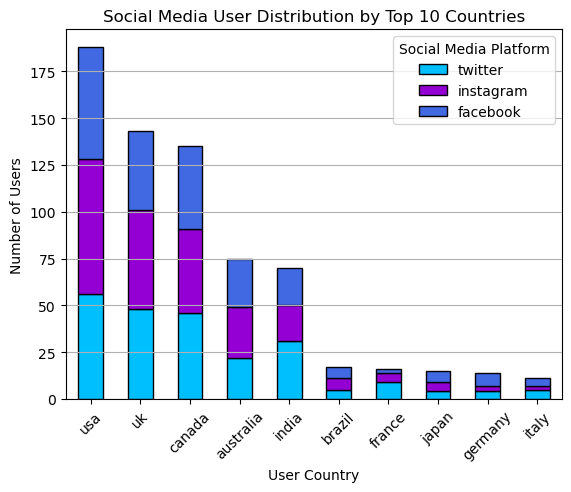

In [37]:
top_10_countries.plot(x='country',
                      kind='bar',
                      stacked=True,
                      color=['deepskyblue', 'darkviolet', 'royalblue'],
                      edgecolor='black')

plt.title('Social Media User Distribution by Top 10 Countries')
plt.xlabel('User Country')
plt.xticks(rotation=45)
plt.ylabel('Number of Users')
plt.legend(title='Social Media Platform')
plt.grid(axis='y')
plt.show()

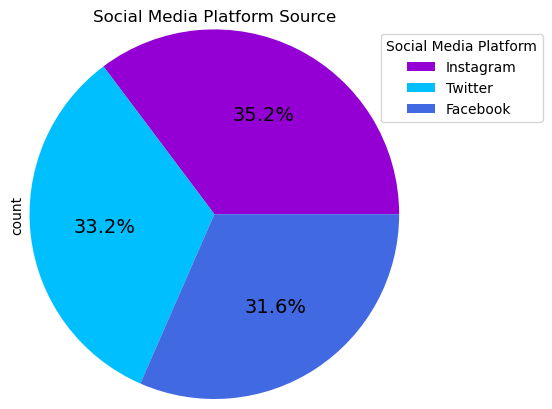

In [38]:
sm['platform'].value_counts().plot(kind='pie',
                                          autopct='%1.1f%%',
                                          fontsize=14,
                                          labels=['', '', ''],
                                          colors=['darkviolet', 'deepskyblue', 'royalblue'],
                                          radius=1.25)

plt.title('Social Media Platform Source')
plt.legend(['Instagram', 'Twitter', 'Facebook'],
           title='Social Media Platform',
           loc=[0.95,.75])
plt.show()

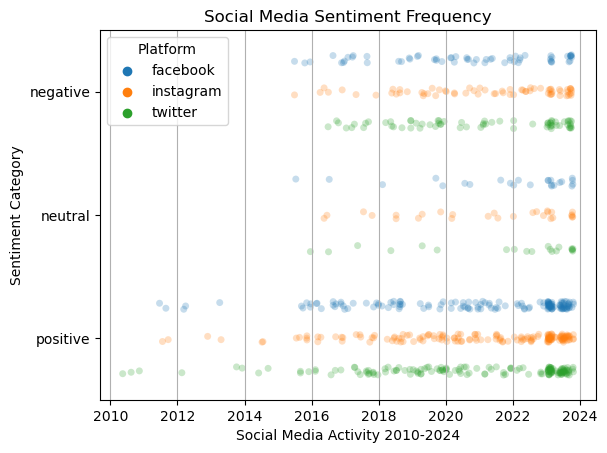

In [39]:
sns.stripplot(data=sm,
              x='timestamp',
              y='sentiment',
              hue='platform',
              dodge=True,
              alpha=.25,
              zorder=1)

plt.title('Social Media Sentiment Frequency')
plt.xlabel('Social Media Activity 2010-2024')
plt.ylabel('Sentiment Category')
plt.legend(title='Platform')
plt.grid(axis='x')
plt.show()

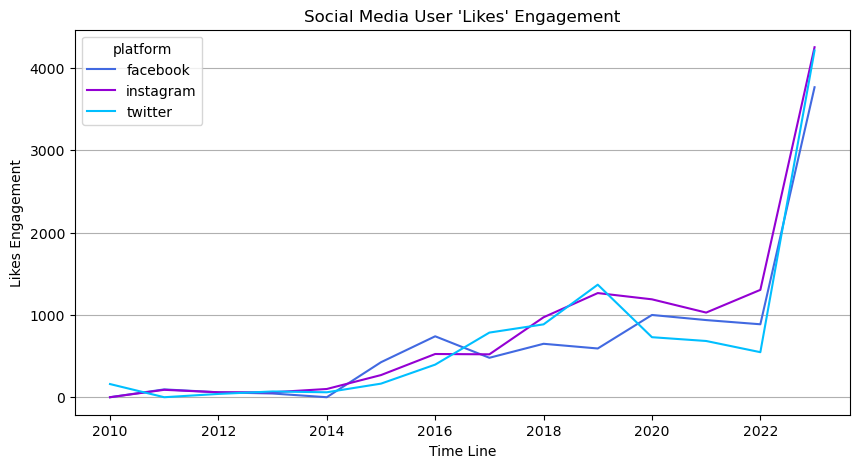

In [40]:
sm.pivot_table(index='year',
               columns='platform',
               values='likes',
               aggfunc='sum').plot(title='Social Media User \'Likes\' Engagement',
                                      xlabel='Time Line',
                                      ylabel='Likes Engagement',
                                      color=['royalblue', 'darkviolet', 'deepskyblue'],
                                      figsize=[10,5])
plt.grid(axis='y')
plt.show()

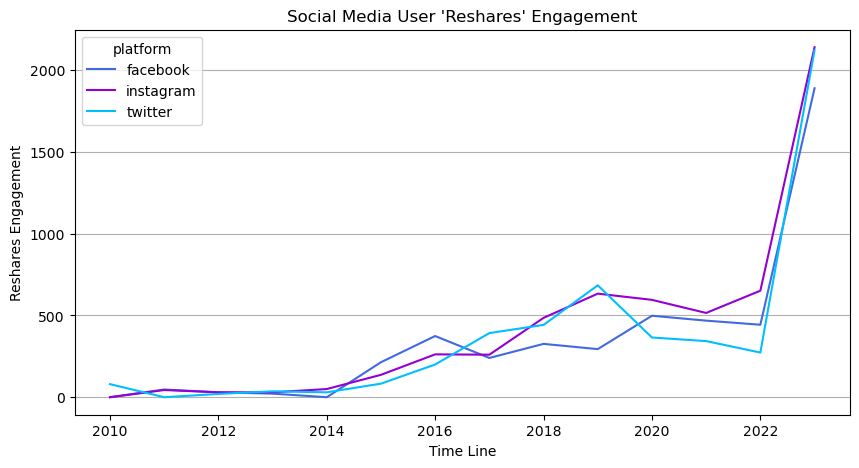

In [41]:
sm.pivot_table(index='year',
               columns='platform',
               values='reshared',
               aggfunc='sum').plot(title='Social Media User \'Reshares\' Engagement',
                                      xlabel='Time Line',
                                      ylabel='Reshares Engagement',
                                      color=['royalblue', 'darkviolet', 'deepskyblue'],
                                      figsize=[10,5])
plt.grid(axis='y')
plt.show()

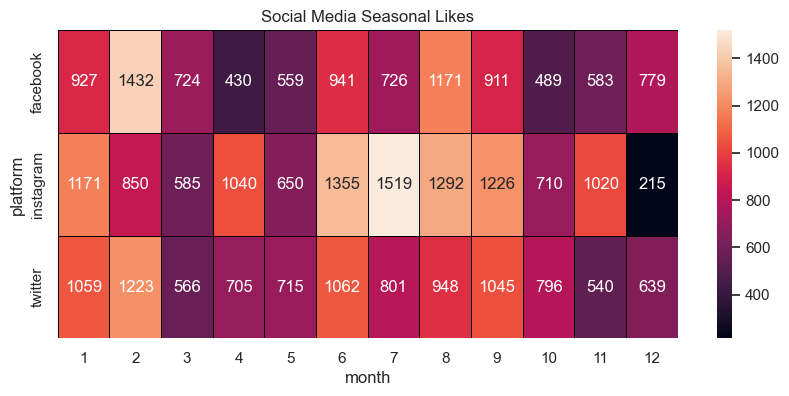

In [42]:
likes_pivot = sm.pivot_table(index='platform',
               columns='month',
               values='likes',
               aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(10, 4))
plt.title('Social Media Seasonal Likes')
sns.heatmap(likes_pivot,
            annot=True,
            fmt='g',
            linewidths=.5,
            linecolor='black')
plt.show()

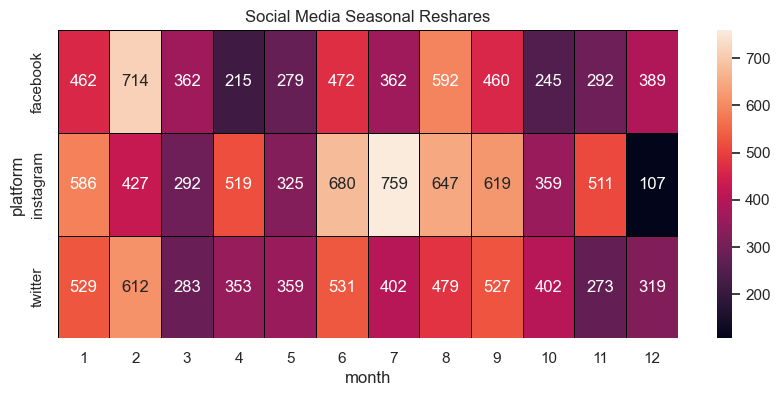

In [43]:
reshared_pivot = sm.pivot_table(index='platform',
               columns='month',
               values='reshared',
               aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(10, 4))
plt.title('Social Media Seasonal Reshares')
sns.heatmap(reshared_pivot,
            annot=True,
            fmt='g',
            linewidths=.5,
            linecolor='black')
plt.show()

In [44]:
user_totals = sm.groupby('platform').agg({'user': 'count',
                                             'likes': 'sum',
                                             'reshared': 'sum'})

In [45]:
user_totals['likes_per_user'] = (user_totals['likes'] / user_totals['user']).round(1)
user_totals['reshares_per_user'] = (user_totals['reshared'] / user_totals['user']).round(1)

user_totals.drop(columns=['user', 'likes', 'reshared'], inplace=True)
user_totals

,likes_per_user,reshares_per_user
platform,,
facebook,41.9,21.0
instagram,45.1,22.6
twitter,41.6,20.9


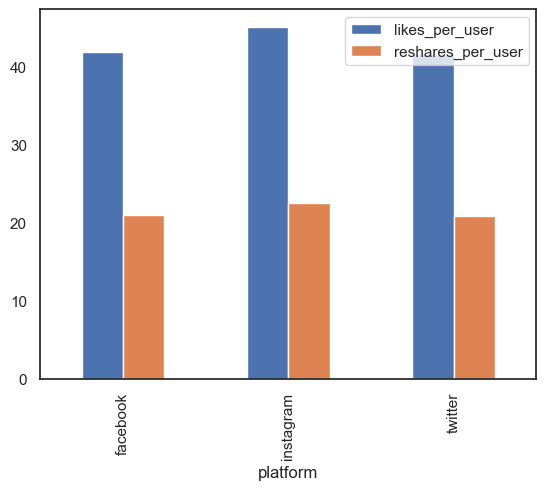

In [46]:
user_totals.plot(kind='bar')
plt.show()

[Back to Table of Contents](#back)

## Conclusion

[Back to Table of Contents](#back)